In [1]:
import pandas as pd 
import numpy as np 
import nltk

import matplotlib.pyplot as plt 
from functools import partial # to reduce df memory consumption by applying to_numeric

import warnings
warnings.filterwarnings('ignore') 

data_path = '/Users/aditi_khullar/Documents/Datascience@Berkeley/W207/FinalProject/data/'

## Loads Data 

In [2]:
aisles = pd.read_csv(data_path + 'aisles.csv', engine='c')

In [3]:
departments = pd.read_csv(data_path + 'departments.csv', engine='c')

In [4]:
products_dtype = {
    'product_id' : np.int32,
    'product_name' : str,
    'aisle_id' : np.int32,
    'department_id' : np.int32
}

products = pd.read_csv(data_path + 'products.csv', engine='c', dtype=products_dtype)

In [5]:
goods = pd.merge(
    left=pd.merge(
        left=products, 
        right=departments, 
        how='left'
    ), 
    right=aisles, 
    how='left'
)

In [6]:
orders_dtype = {
    'order_id': np.int32, 
    'user_id': np.int32, 
    'order_number': np.int32,
    'order_dow': np.int8,
    'order_hour_of_day': np.int8,
    'days_since_prior_order': np.float16
}


orders = pd.read_csv(data_path + 'orders.csv', engine='c', dtype=orders_dtype)

In [7]:
op_prior_dtype = {
    'order_id': np.int32, 
    'product_id': np.int32, 
    'add_to_cart_order': np.int16, 
    'reordered': np.int8
}

op_prior = pd.read_csv(data_path + 'order_products__prior.csv', engine='c', dtype=op_prior_dtype)

In [9]:
op_train_dtype = {
    'order_id': np.int32, 
    'product_id': np.int32, 
    'add_to_cart_order': np.int16, 
    'reordered': np.int8
}

op_train = pd.read_csv(data_path + 'order_products__train.csv', engine='c', dtype=op_train_dtype)

In [10]:
dataframes = {
    'aisles': aisles, 
    'departments' : departments, 
    'products' : products, 
    'goods' : goods,
    'orders' : orders, 
    'op_prior' : op_prior, 
    'op_train' : op_train
}

## Basic counts

In [11]:
def count_tables():
    print("Number of records per dataframe")
    for idx, df in dataframes.items():
        print(idx, ' : ', df.shape[0])
    
count_tables()

Number of records per dataframe
orders  :  3421083
op_prior  :  32434489
aisles  :  134
goods  :  49688
departments  :  21
op_train  :  1384617
products  :  49688


In [13]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [16]:
goods.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [17]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
op_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
op_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## Analysis on Goods (Products, Aisles, Departments)

In [92]:
# number of products per department and aisle
#goods[['department', 'aisle','product_name']].groupby(['department', 'aisle']).agg(['count'])

In [23]:
# number of aisles per department
def G1():
    temp = goods.groupby('department')['aisle'].nunique()
    temp2 = temp.sort_values(ascending=False)
    #print(temp.columns.values)
    print(temp2)

G1()

department
personal care      17
pantry             12
snacks             11
frozen             11
dairy eggs         10
household          10
beverages           8
meat seafood        7
deli                5
bakery              5
canned goods        5
alcohol             5
dry goods pasta     5
produce             5
breakfast           4
international       4
babies              4
bulk                2
pets                2
other               1
missing             1
Name: aisle, dtype: int64


In [27]:
# Top 5 counts of offered products, by department and aisle
def G2():
    temp = goods[['department', 'aisle','product_name']].groupby(['department', 'aisle']).agg(['count'])
    temp2 = temp.sort(('product_name', 'count'), ascending=False)
#     print(temp2.columns.values)
#     print(temp2.columns.size)
#     print(temp2)
    print( temp2.head(5) )

G2()

                                   product_name
                                          count
department    aisle                            
missing       missing                      1258
snacks        candy chocolate              1246
frozen        ice cream ice                1091
personal care vitamins supplements         1038
dairy eggs    yogurt                       1026


## Analysis on Orders (Orders, Orders Prior, Orders Train)

In [29]:
# Number of orders per category
def R1():
    temp = orders[['order_id', 'eval_set']].groupby(['eval_set']).agg(['count'])
    temp2 = temp.sort([('order_id','count')], ascending=False)
    print(temp2)

R1()

         order_id
            count
eval_set         
prior     3214874
train      131209
test        75000


In [31]:
# Number of distinct users
def R2():
    temp = orders['user_id'].nunique()
    print(temp)
    
R2()

206209


In [32]:
# Number of missing days since prior order
def R3():
    isnull_filter = pd.isnull(orders['days_since_prior_order'])
    #print(isnull_filter)
    #temp = orders[isnull_filter].groupby(['days_since_prior_order']).agg(['count'])
    temp = orders[isnull_filter]
    print(temp['order_id'].count())

R3()

206209


Note, the number of missing days since prior order should be equal to the number of distinct users, because we'd expect each users to have ordered for the first time at least once.

In [35]:
# Top 5 number of orders per user
def R4():
    temp = orders[['order_id', 'user_id']].groupby(['user_id']).agg(['count'])
    temp2 = temp.sort([('order_id','count')], ascending=False)
    print(temp2.head(5))
R4()

        order_id
           count
user_id         
152340       100
185641       100
185524       100
81678        100
70922        100


The most orders our customers have placed seems to max out at 100 orders, reflecting the truncated nature of this dataset.

In [37]:
# Basic statistics on the number of orders per user
def R5():
    temp = orders[['order_id', 'user_id']].groupby(['user_id']).agg(['count'])
    temp2 = temp.sort([('order_id','count')], ascending=False)
    print(temp2.describe())
    
R5()

            order_id
               count
count  206209.000000
mean       16.590367
std        16.654774
min         4.000000
25%         6.000000
50%        10.000000
75%        20.000000
max       100.000000


It looks like in our truncated orders dataset, we have a sample mean of 16 orders per user. And a minimum of 4 orders, and a maximum of 100 orders.

### Distributions

In [44]:
import pandas as pd
%matplotlib inline

##### Order hour of day

Distribution of order's hour of day. 3pm is the peak hour of the day when most orders are made.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11217f978>]], dtype=object)

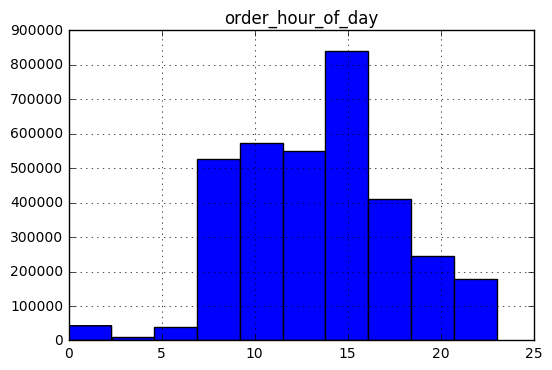

In [45]:
orders.hist(column='order_hour_of_day')

#### Order day of the week

Distribution of order's day of the week. Sunday and Monday are two days during users tend to make more orders.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112d76668>]], dtype=object)

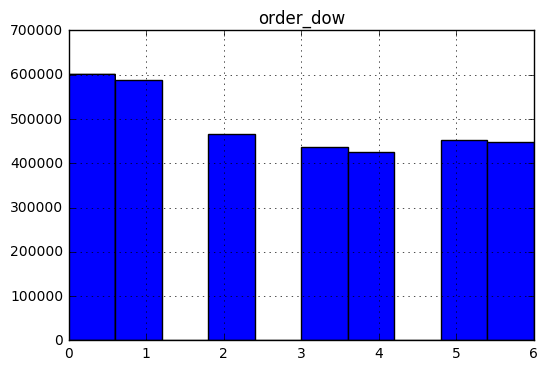

In [47]:
orders.hist(column='order_dow')

#### Days since prior order

Checking the distribution of Days since prior order. Most people order within 5-10 days of their previous order.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1132c6390>]], dtype=object)

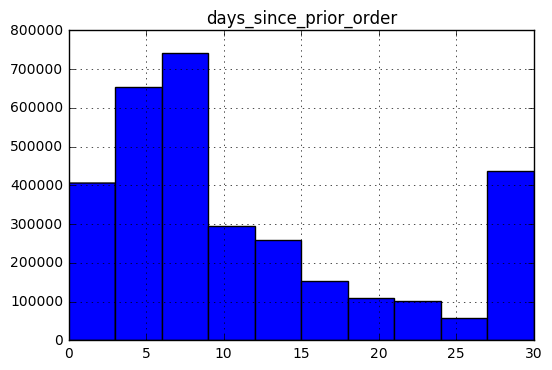

In [50]:
orders.hist(column='days_since_prior_order')